In [273]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from keras.datasets import mnist
import seaborn as sns

In [274]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [275]:
print(len(x_test)) #we get 10,000 images
print(len(x_train)) #we get 60,000 images

10000
60000


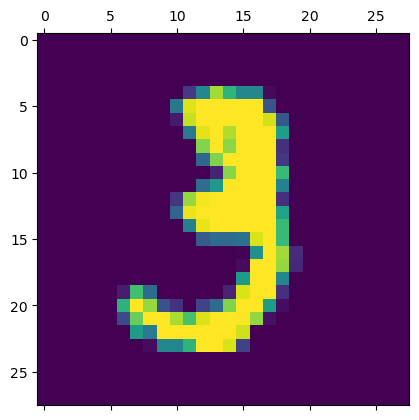

In [276]:
plt.matshow(x_train[10]) # can go upto 59999 images

In [277]:
x_test = x_test / 255
x_train = x_train / 255

In [278]:
x_train[22]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshaping the image

In [279]:
x_train.shape

(60000, 28, 28)

In [280]:
x_train_Flattened = x_train.reshape(len(x_train) , 28 * 28) #2D array to 1D array
x_test_Flattened = x_test.reshape(len(x_test) , 28 * 28)  #2D array to 1D array

In [281]:
x_train_Flattened.shape

(60000, 784)

##### The below code creates a neural network model with one dense layer. This layer has 10 neurons and expects input data with 784 features. The sigmoid activation function is used in the neurons to produce outputs between 0 and 1

<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg" width="800" height="400">


In [282]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation="sigmoid" )
])

model.compile(
    optimizer="adam" , 
    loss='sparse_categorical_crossentropy' ,
    metrics="accuracy"
)

model.fit(x_train_Flattened,y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4697 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2612 - accuracy: 0.9278
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2532 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [283]:
model.evaluate(x_test_Flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9272


[0.2628842890262604, 0.9272000193595886]

313/313 [==============================] - 0s 1ms/step


6

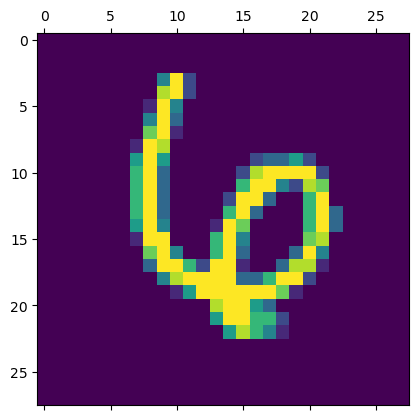

In [284]:
y_predicted = model.predict(x_test_Flattened)
plt.matshow(x_test[22])
y_predicted[22]
np.argmax(y_predicted[22]
)

Text(33.22222222222222, 0.5, 'Real values')

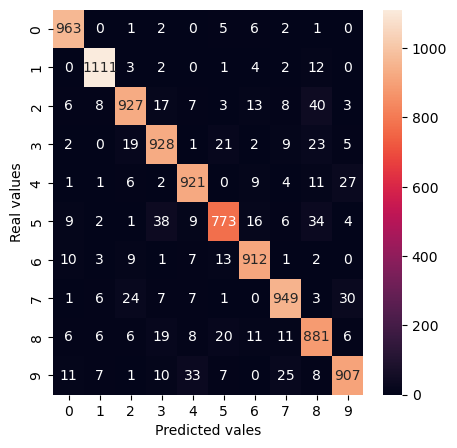

In [285]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted vales')
plt.ylabel('Real values') 

#### After creating Hidden Layers

In [286]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2704 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [287]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.9781


[0.07839464396238327, 0.9781000018119812]

313/313 [==============================] - 0s 1ms/step


6

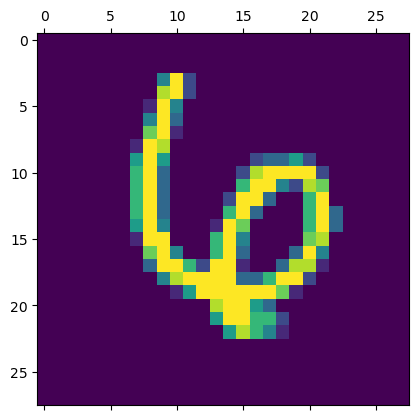

In [288]:
y_predicted = model.predict(x_test)
plt.matshow(x_test[22])
y_predicted[22]
np.argmax(y_predicted[22])

Text(33.22222222222222, 0.5, 'Real values')

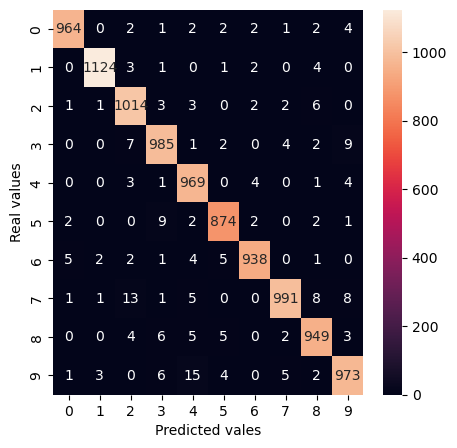

In [289]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted vales')
plt.ylabel('Real values') 